# 3. Linear Regression

- Cor & Cov

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt

$$Correlation = \frac{Cov(X, Y)}{\sqrt {Var(X) * Var(Y)}}$$

$$\begin{align} 
Cov(X, Y) &= E(X-E(X))E(Y-E(Y)) \\
&=E(XY)-E(X)E(Y)
\end{align}$$

In [2]:
A = np.array([[1, 2, 3], [4, 5, 10]]).T
A

array([[ 1,  4],
       [ 2,  5],
       [ 3, 10]])

In [3]:
A[:,0]

array([1, 2, 3])

In [4]:
np.corrcoef(A[:,0],A[:,1])

array([[1.        , 0.93325653],
       [0.93325653, 1.        ]])

In [5]:
A = np.array([[1, 2, 3], [-1, -1.5, -5]]).T
A

array([[ 1. , -1. ],
       [ 2. , -1.5],
       [ 3. , -5. ]])

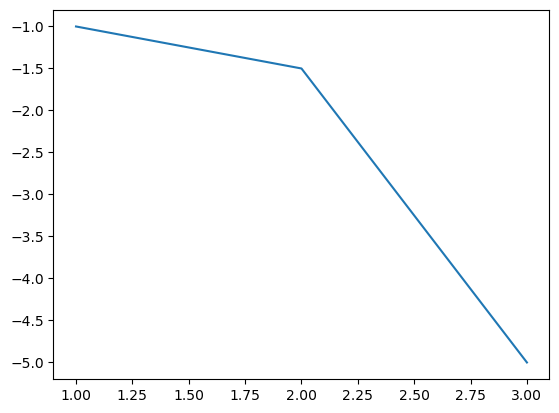

In [6]:
plt.plot(A[:, 0], A[:, 1])

In [7]:
np.corrcoef(A[:, 0], A[:, 1])

array([[ 1.        , -0.91766294],
       [-0.91766294,  1.        ]])

|\|Cor\||相关性|      
|:--:|:--:|   
|0~0.09|没有相关性|      
|0.1~0.3|弱相关|
|0.3~0.5|中等相关|
|0.5~1.0|强相关|

In [8]:
np.random.randn(20)
X = np.random.randn(20)
y = X + 1
np.corrcoef(X, y)

array([[1., 1.],
       [1., 1.]])

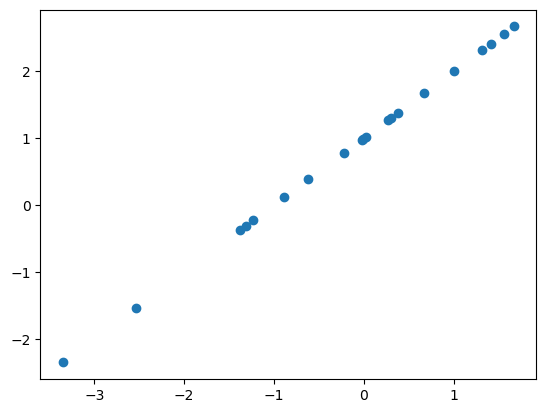

In [9]:

plt.plot(X, y, 'o')

In [10]:
a = y.shape
a

(20,)

In [11]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

In [12]:
np.random.normal(size=a)

array([-1.28625275,  0.65711589, -0.74396384,  0.87793653, -1.23711321,
       -0.98979312, -0.52400318,  0.80582981, -1.06619734, -1.12775891,
       -0.07529507,  0.17773309,  0.44627874, -1.02213786, -0.31160943,
        2.30313197,  0.47261262,  1.18376089, -0.20120922,  0.38152367])

In [ ]:
np.random.normal?

In [13]:
ran = np.random.normal(size = X.shape)
ran

array([-0.28997717,  2.08293691, -0.06160529, -0.41775774,  1.00334722,
       -1.04180911, -0.8726181 , -1.83205999,  0.57278065, -0.60535201,
       -0.39637333, -0.277989  ,  0.58272078,  1.44005988, -1.60940032,
       -0.27752318,  0.42090246, -1.80448767,  1.02028988,  0.57762051])

In [14]:
delta = 0.5
r = ran * delta
r

array([-0.14498858,  1.04146846, -0.03080265, -0.20887887,  0.50167361,
       -0.52090456, -0.43630905, -0.91603   ,  0.28639032, -0.30267601,
       -0.19818667, -0.1389945 ,  0.29136039,  0.72002994, -0.80470016,
       -0.13876159,  0.21045123, -0.90224384,  0.51014494,  0.28881025])

In [15]:
y1 = y + r
y1

array([ 0.87531517,  1.81549524,  1.635369  , -0.09570973, -1.84846537,
        1.88686532,  0.53601078,  0.3504473 ,  2.95104059,  2.01155288,
       -1.73038164, -0.51420212,  0.67271417,  2.09697232,  0.49400094,
       -0.45338517,  2.21341546,  0.08830422,  3.06500891,  0.05896238])

Text(0.5, 1.0, 'y=x+1+r')

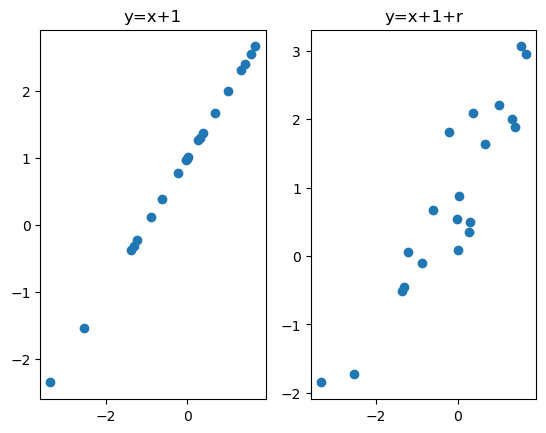

In [16]:
plt.subplot(121)
plt.plot(X, y, 'o')
plt.title('y=x+1')
plt.subplot(122)
plt.plot(X, y1, 'o')
plt.title('y=x+1+r')

In [17]:
# delta
dl = [0.5, 0.7, 1, 1.5, 2, 5]
yl = []         
cl = []               

In [18]:
for i in dl:
    yn = X + 1 + (ran * i)
    cl.append(np.corrcoef(X, yn))
    yl.append(yn)

In [20]:
cl

[array([[1.        , 0.92498201],
        [0.92498201, 1.        ]]),
 array([[1.        , 0.86311981],
        [0.86311981, 1.        ]]),
 array([[1.        , 0.75891929],
        [0.75891929, 1.        ]]),
 array([[1.       , 0.5961707],
        [0.5961707, 1.       ]]),
 array([[1.        , 0.46906519],
        [0.46906519, 1.        ]]),
 array([[1.        , 0.14884765],
        [0.14884765, 1.        ]])]

In [21]:
y1

array([ 0.87531517,  1.81549524,  1.635369  , -0.09570973, -1.84846537,
        1.88686532,  0.53601078,  0.3504473 ,  2.95104059,  2.01155288,
       -1.73038164, -0.51420212,  0.67271417,  2.09697232,  0.49400094,
       -0.45338517,  2.21341546,  0.08830422,  3.06500891,  0.05896238])

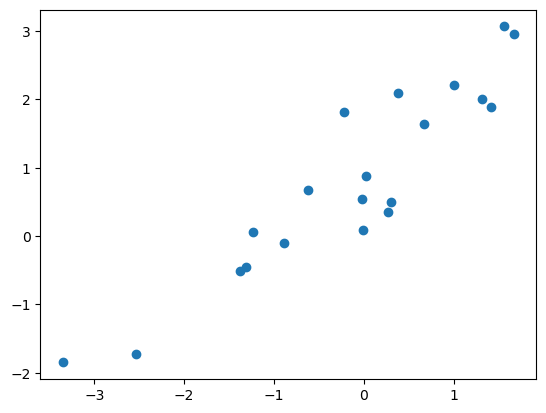

In [22]:
plt.plot(X, yl[0], 'o')

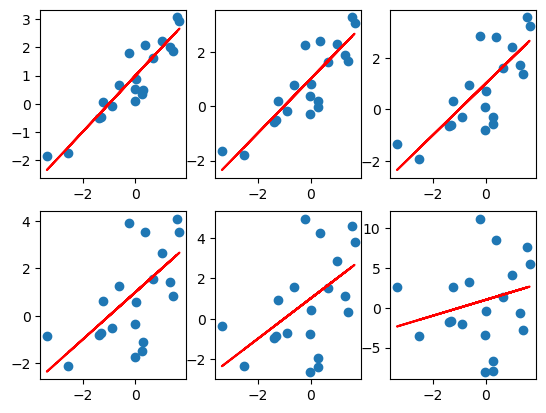

In [23]:
plt.subplot(231)
plt.plot(X, yl[0], 'o')
plt.plot(X, y, 'r-')
plt.subplot(232)
plt.plot(X, yl[1], 'o')
plt.plot(X, y, 'r-')
plt.subplot(233)
plt.plot(X, yl[2], 'o')
plt.plot(X, y, 'r-')
plt.subplot(234)
plt.plot(X, yl[3], 'o')
plt.plot(X, y, 'r-')
plt.subplot(235)
plt.plot(X, yl[4], 'o')
plt.plot(X, y, 'r-')
plt.subplot(236)
plt.plot(X, yl[5], 'o')
plt.plot(X, y, 'r-')

- Data Generator

In [25]:
num_inputs = 2               
num_examples = 1000 
np.random.seed(24)              

In [24]:
np.random.randn(2, 2)

array([[ 1.07258215, -1.77292284],
       [ 0.42913948, -0.39046689]])

In [26]:
# weight
w_true = np.array([2, -1]).reshape(-1, 1)
b_true = np.array(1)

delta = 0.01

# feature & labels
features = np.random.randn(num_examples, num_inputs)
labels_true = features.dot(w_true) + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * delta

In [27]:
features

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039],
       [-1.07081626, -1.43871328],
       ...,
       [ 1.5507578 , -0.35986144],
       [-1.36267161, -0.61353562],
       [-1.44029131,  0.50439425]])

In [28]:
labels_true

array([[ 4.42845780e+00],
       [ 1.35824967e+00],
       [ 2.97080769e-01],
       [ 1.83311182e+00],
       [-2.47237367e+00],
       [ 4.68336867e-01],
       [ 2.81906560e+00],
       [-8.12559166e-01],
       [ 2.84911190e+00],
       [ 8.16104836e-01],
       [-2.23673251e+00],
       [ 3.84903763e+00],
       [ 3.57341849e-02],
       [-6.31876174e-01],
       [ 6.71457939e-01],
       [-2.91185026e-01],
       [ 5.69912892e+00],
       [ 5.94732168e+00],
       [ 1.08837176e-01],
       [-4.63796210e-01],
       [ 3.23817195e+00],
       [-3.74448288e+00],
       [ 2.94300273e+00],
       [ 9.09452631e-01],
       [-1.86514513e+00],
       [ 3.34061566e+00],
       [ 2.82759572e+00],
       [-2.68017804e-01],
       [ 1.18081099e+00],
       [-5.77104701e-01],
       [-1.86902545e-01],
       [ 4.59659037e+00],
       [ 2.91058551e+00],
       [-2.92879416e+00],
       [-2.24480799e+00],
       [ 7.42354926e-01],
       [ 4.96769843e-01],
       [-8.56161409e-01],
       [ 2.3

> labels_true and features 

$$y = 2x_1-x_2+1$$

In [33]:
features[: 10]

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039],
       [-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       [ 0.6788048 ,  1.88927273],
       [ 0.9615384 ,  0.1040112 ],
       [-0.48116532,  0.85022853],
       [ 1.45342467,  1.05773744],
       [ 0.16556161,  0.51501838]])

In [34]:
labels[: 10]

array([[ 4.43811826],
       [ 1.375912  ],
       [ 0.30286597],
       [ 1.81970897],
       [-2.47783626],
       [ 0.47374318],
       [ 2.83085905],
       [-0.83695165],
       [ 2.84344069],
       [ 0.8176895 ]])

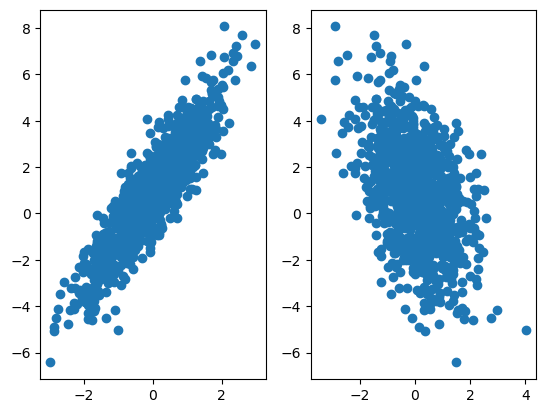

In [43]:
plt.subplot(121)
plt.scatter(features[:, 0], labels)          # feature1 & label
plt.subplot(122)
plt.scatter(features[:, 1], labels)          # feature2 & label

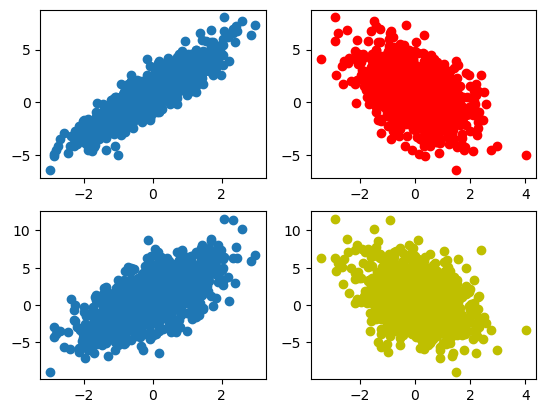

In [44]:
np.random.seed(24)   

labels1 = labels_true + np.random.normal(size = labels_true.shape) * 2

# small delta
plt.subplot(221)
plt.scatter(features[:, 0], labels)             
plt.subplot(222)
plt.plot(features[:, 1], labels, 'ro')          

# big delta
plt.subplot(223)
plt.scatter(features[:, 0], labels1)             
plt.subplot(224)
plt.plot(features[:, 1], labels1, 'yo')          

- create dataset $y=2x^2+1$

In [45]:
np.power([2, 3], 2)

array([4, 9], dtype=int32)

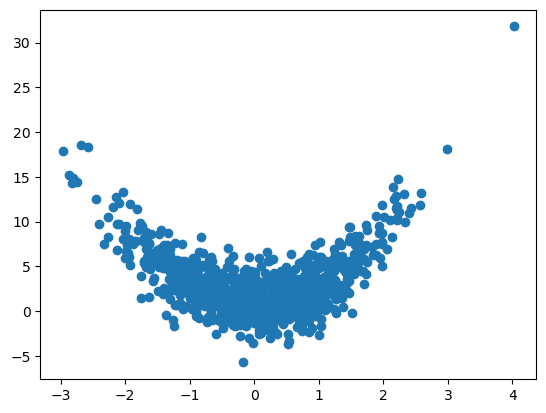

In [46]:
np.random.seed(24)   

num_inputs = 1               
num_examples = 1000          

w_true = np.array(2)
b_true = np.array(1)

features = np.random.randn(num_examples, num_inputs)
labels_true = np.power(features, 2) * w_true + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * 2

plt.scatter(features, labels)

- $y=2x_1-x_2+1$

In [47]:
def arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1):
    
    if bias == True:
        num_inputs = len(w)-1                                                           
        features_true = np.random.randn(num_examples, num_inputs)                       
        w_true = np.array(w[:-1]).reshape(-1, 1)                                        
        b_true = np.array(w[-1])                                                        
        labels_true = np.power(features_true, deg).dot(w_true) + b_true                 
        features = np.concatenate((features_true, np.ones_like(labels_true)), axis=1)    
    else: 
        num_inputs = len(w)
        features = np.random.randn(num_examples, num_inputs) 
        w_true = np.array(w).reshape(-1, 1)         
        labels_true = np.power(features, deg).dot(w_true)
    labels = labels_true + np.random.normal(size = labels_true.shape) * delta
    return features, labels

In [48]:
np.random.seed(24)   
f, l = arrayGenReg(delta=0.01)

f

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

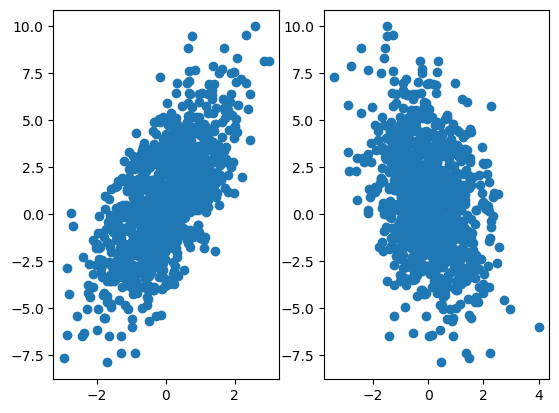

In [49]:
np.random.seed(24)   
f, l = arrayGenReg(delta=2)

plt.subplot(121)
plt.scatter(f[:, 0], l)             
plt.subplot(122)
plt.scatter(f[:, 1], l)             

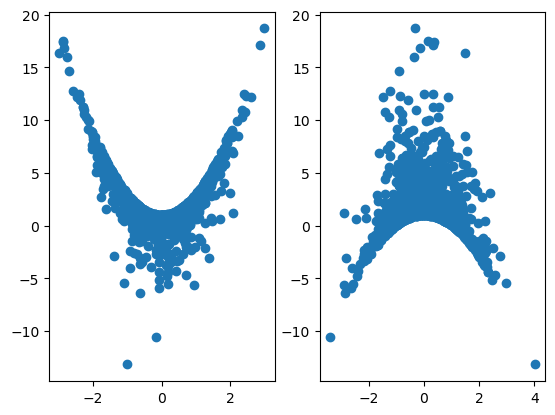

In [50]:
np.random.seed(24)   

f, l = arrayGenReg(deg=2)

plt.subplot(121)
plt.scatter(f[:, 0], l)             # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(f[:, 1], l)             # 第二个特征和标签的关系

In [53]:
np.random.seed(24)   

features, labels = arrayGenReg(delta=0.01)

$$ f(x) = w_1x_1+w_2x_2+b $$

- SSE

In [54]:
np.random.seed(24)
w = np.random.randn(3).reshape(-1, 1)
w

array([[ 1.32921217],
       [-0.77003345],
       [-0.31628036]])

In [55]:
y_hat = features.dot(w)
y_hat[:10]

array([[ 2.04347616],
       [ 0.02627308],
       [-0.63176501],
       [ 0.20623364],
       [-2.64718921],
       [-0.86880796],
       [ 0.88171608],
       [-1.61055557],
       [ 0.80113619],
       [-0.49279524]])

$SSE= ||y - X\hat w||_2^2 = (y - \hat y)^T(y - \hat y)$

In [ ]:
#SSE
(labels - y_hat).T.dot(labels - y_hat)
# MSE
(labels - y_hat).T.dot(labels - y_hat) / len(labels)


In [57]:
def SSELoss(X, w, y):

    y_hat = X.dot(w)
    SSE = (y - y_hat).T.dot(y - y_hat)
    return SSE

In [58]:
SSELoss(features, w, labels)

array([[2093.52940481]])

- LSM

$$\hat w = (X^TX)^{-1}X^Ty$$

In [59]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(labels)
w

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

In [60]:
SSELoss(features, w, labels)

array([[0.09300731]])

In [61]:
SSELoss(features, w, labels) / len(y)

array([[0.00465037]])

In [62]:
np.linalg.lstsq(features, labels, rcond=-1)

(array([[ 1.99961892],
        [-0.99985281],
        [ 0.99970541]]),
 array([0.09300731]),
 3,
 array([32.70582436, 31.3166949 , 30.3678959 ]))

- Validation

In [67]:
def array_split(features, labels, rate=0.7, random_state=24):
    
    np.random.seed(random_state)                           
    np.random.shuffle(features)                             
    np.random.seed(random_state)
    np.random.shuffle(labels)                               
    num_input = len(labels)                                 
    split_indices = int(num_input * rate)                   
    Xtrain, Xtest = np.vsplit(features, [split_indices, ])  
    ytrain, ytest = np.vsplit(labels, [split_indices, ])
    return Xtrain, Xtest, ytrain, ytest

In [68]:
f = np.arange(10).reshape(-1, 1)                 # 创建特征0-9
f

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [69]:
l = np.arange(1, 11).reshape(-1, 1)             # 创建标签1-10，保持和特征+1的关系
l

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

- Linear Regression

In [70]:
np.random.seed(24)   

features, labels = arrayGenReg(delta=0.01)

Xtrain, Xtest, ytrain, ytest = array_split(features, labels)

In [71]:
w = np.linalg.inv(Xtrain.T.dot(Xtrain)).dot(Xtrain.T).dot(ytrain)
w

array([[ 1.99976073],
       [-0.99986178],
       [ 0.99934303]])

In [72]:
SSELoss(Xtest, w, ytest)

array([[0.02725208]])